# Kaggle Bike Sharing Demand(レンタサイクルの需要予測)

## データの確認

In [495]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # グラフ描画用
import seaborn as sns; sns.set() # グラフ描画用

In [466]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
df = pd.concat([train, test])
# df.to_csv('output/df.csv',index=False)

In [467]:
test_datetime = pd.DataFrame(test['datetime'])
test_datetime.head()

,datetime
0,2011-01-20 00:00:00
1,2011-01-20 01:00:00
2,2011-01-20 02:00:00
3,2011-01-20 03:00:00
4,2011-01-20 04:00:00


In [468]:
display(train.shape)
display(test.shape)
display(df.shape)
print('test:' + str(round(test.shape[0]/df.shape[0]*100,1)) + '%')

(10886, 12)

(6493, 9)

(17379, 12)

test:37.4%


In [469]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [470]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [471]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [472]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,10886.000000,10886.000000,10886.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,36.021955,155.552177,191.574132
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,118.000000,145.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [473]:
# season = 4
# display(((train["weather"].values == 1) & (train["season"].values == season)).sum() / (train["season"].values == season).sum()*100)
# display(((train["weather"].values == 2) & (train["season"].values == season)).sum() / (train["season"].values == season).sum()*100)
# display(((train["weather"].values == 3) & (train["season"].values == season)).sum() / (train["season"].values == season).sum()*100)
# display(((train["weather"].values == 4) & (train["season"].values == season)).sum() / (train["season"].values == season).sum()*100)
# season = 3
# train.loc[(train["season"].values == season)]['temp'].min()

## データの加工

やること
- 日付から年、月、日、時間の列を生成 ok
- season番号の振り直し ok
- weekend列の作成 ok
- 新規利用者比率
- 降水量の推定. weatherとhumidityで特徴量作れるか
- キャンペーン日の特定(月初めの決まった曜日？)

In [474]:
df['year'] = pd.to_datetime(df['datetime']).dt.strftime('%Y')
df['month'] = pd.to_datetime(df['datetime']).dt.strftime('%m')
df['day'] = pd.to_datetime(df['datetime']).dt.strftime('%d')
df['weekday'] = pd.to_datetime(df['datetime']).dt.strftime('%a')
df['hour'] = pd.to_datetime(df['datetime']).dt.strftime('%H')

In [475]:
df['weekend'] = 0
df.loc[(df['holiday'].values==0) & (df['workingday'].values==0),'weekend'] = 1

In [476]:
df['day_type'] = 'holiday'
df.loc[(df['workingday'].values==1), 'day_type'] = 'workingday'
df.loc[(df['weekend'].values==1), 'day_type'] = 'weekend'

In [477]:
df['month'] = df['month'].astype('int')
spring_begin = 3
summer_begin = 6
fall_begin = 9
df['season_rev'] = 4 #12,1,2月は面倒なので先に代入
df.loc[(df['month'].values >= spring_begin) & (df['month'].values < (spring_begin+3)),'season_rev'] = 1
df.loc[(df['month'].values >= summer_begin) & (df['month'].values < (summer_begin+3)),'season_rev'] = 2
df.loc[(df['month'].values >= fall_begin  ) & (df['month'].values < (fall_begin+3  )),'season_rev'] = 3
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour,weekend,day_type,season_rev
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,1,01,Sat,00,1,weekend,4
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1,01,Sat,01,1,weekend,4
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,1,01,Sat,02,1,weekend,4
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,1,01,Sat,03,1,weekend,4
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,1,01,Sat,04,1,weekend,4


In [478]:
df['casual_ratio'] = df['casual']/df['count']*100

In [479]:
df = df[['datetime', 'year', 'month', 'day', 'weekday', 'hour', 'season', 'season_rev',
         'day_type', 'holiday', 'workingday', 'weekend',
         'weather', 'temp','atemp', 'humidity', 'windspeed',
         'casual', 'registered', 'count', 'casual_ratio'
       ]]
df.head()

,datetime,year,month,day,weekday,hour,season,season_rev,day_type,holiday,...,weekend,weather,temp,atemp,humidity,windspeed,casual,registered,count,casual_ratio
0,2011-01-01 00:00:00,2011,1,01,Sat,00,1,4,weekend,0,...,1,1,9.84,14.395,81,0.0,3.0,13.0,16.0,18.750000
1,2011-01-01 01:00:00,2011,1,01,Sat,01,1,4,weekend,0,...,1,1,9.02,13.635,80,0.0,8.0,32.0,40.0,20.000000
2,2011-01-01 02:00:00,2011,1,01,Sat,02,1,4,weekend,0,...,1,1,9.02,13.635,80,0.0,5.0,27.0,32.0,15.625000
3,2011-01-01 03:00:00,2011,1,01,Sat,03,1,4,weekend,0,...,1,1,9.84,14.395,75,0.0,3.0,10.0,13.0,23.076923
4,2011-01-01 04:00:00,2011,1,01,Sat,04,1,4,weekend,0,...,1,1,9.84,14.395,75,0.0,0.0,1.0,1.0,0.000000


In [480]:
# day_count = train.pivot_table(index='day_type', columns=['day'], aggfunc='size', fill_value=0)
# display(day_count)
# campaign = train.loc[(train['casual_ratio'].values >= 50)].pivot_table(index='day_type', columns=['day'], aggfunc='size', fill_value=0)
# display(campaign)
# # 4月,7月,9月の特定日に新規利用者比率の外れ値が見られる

## データの前処理
時系列データをint型に変更
day_typeをLabelEncoderで数値に変換

In [481]:
from sklearn.preprocessing import LabelEncoder

In [482]:
df['year'] = df['year'].astype('int')
df['day'] = df['day'].astype('int')
df['hour'] = df['hour'].astype('int')

In [483]:
le = LabelEncoder()
le.fit(df['weekday'])
df['weekday'] = le.transform(df['weekday'])
le.fit(df['day_type'])
df['day_type'] = le.transform(df['day_type'])

In [484]:
df.head()

,datetime,year,month,day,weekday,hour,season,season_rev,day_type,holiday,...,weekend,weather,temp,atemp,humidity,windspeed,casual,registered,count,casual_ratio
0,2011-01-01 00:00:00,2011,1,1,2,0,1,4,1,0,...,1,1,9.84,14.395,81,0.0,3.0,13.0,16.0,18.750000
1,2011-01-01 01:00:00,2011,1,1,2,1,1,4,1,0,...,1,1,9.02,13.635,80,0.0,8.0,32.0,40.0,20.000000
2,2011-01-01 02:00:00,2011,1,1,2,2,1,4,1,0,...,1,1,9.02,13.635,80,0.0,5.0,27.0,32.0,15.625000
3,2011-01-01 03:00:00,2011,1,1,2,3,1,4,1,0,...,1,1,9.84,14.395,75,0.0,3.0,10.0,13.0,23.076923
4,2011-01-01 04:00:00,2011,1,1,2,4,1,4,1,0,...,1,1,9.84,14.395,75,0.0,0.0,1.0,1.0,0.000000


In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      17379 non-null  object 
 1   year          17379 non-null  int64  
 2   month         17379 non-null  int64  
 3   day           17379 non-null  int64  
 4   weekday       17379 non-null  int64  
 5   hour          17379 non-null  int64  
 6   season        17379 non-null  int64  
 7   season_rev    17379 non-null  int64  
 8   day_type      17379 non-null  int64  
 9   holiday       17379 non-null  int64  
 10  workingday    17379 non-null  int64  
 11  weekend       17379 non-null  int64  
 12  weather       17379 non-null  int64  
 13  temp          17379 non-null  float64
 14  atemp         17379 non-null  float64
 15  humidity      17379 non-null  int64  
 16  windspeed     17379 non-null  float64
 17  casual        10886 non-null  float64
 18  registered    10886 non-nul

## 機械学習
trainデータを分割してcasualとregisteredを目的変数に設定

In [494]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # モデル評価用(平均二乗誤差)
from sklearn.metrics import r2_score # モデル評価用(決定係数)

In [487]:
df = df[[
    # 'datetime', 
    'year', 
    'month', 
    # 'day', train:1-19,test:20-
    'weekday', 
    'hour', 
    # 'season',       
    # 'season_rev', 
    'day_type', 
    # 'holiday', 
    # 'workingday', 
    # 'weekend', 
    'weather',
    'temp',
    # 'atemp',
    'humidity',
    'windspeed',
    'casual',
    'registered',
    # 'count',
    # 'casual_ratio',
    ]]
df.head()

,year,month,weekday,hour,day_type,weather,temp,humidity,windspeed,casual,registered
0,2011,1,2,0,1,1,9.84,81,0.0,3.0,13.0
1,2011,1,2,1,1,1,9.02,80,0.0,8.0,32.0
2,2011,1,2,2,1,1,9.02,80,0.0,5.0,27.0
3,2011,1,2,3,1,1,9.84,75,0.0,3.0,10.0
4,2011,1,2,4,1,1,9.84,75,0.0,0.0,1.0


In [488]:
train = df.iloc[:len(train),:].copy()
train.shape
# test  = df.iloc[len(train):,:].copy()

(10886, 11)

### casualを学習

In [519]:
trg = 'casual'
X = train.drop(['casual'], axis=1)
y = train['casual']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=0)

In [520]:
# model = lgb.LGBMRegressor()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# df_pred = pd.DataFrame({'casual':y_test,'casual_pred':y_pred})
# display(df_pred)

In [521]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train) 

# LightGBM parameters
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression', # 目的 : 回帰  
        'metric': {'rmse'}, # 評価指標 : rsme(平均二乗誤差の平方根) 
        'learning_rate': 0.1,
        'num_leaves': 23,
        'min_data_in_leaf': 1,
        'num_trees': 1000, #1000回学習
        'verbose': 0
}

# モデルの学習
model = lgb.train(params, # パラメータ
            train_set=lgb_train, # トレーニングデータの指定
            valid_sets=lgb_eval, # 検証データの指定
            early_stopping_rounds=100 # 100回ごとに検証精度の改善を検討　→ 精度が改善しないなら学習を終了(過学習に陥るのを防ぐ)
               )

# テストデータの予測
y_pred = model.predict(X_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's rmse: 46.4974
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 42.7909
[3]	valid_0's rmse: 39.5363
[4]	valid_0's rmse: 36.6865
[5]	valid_0's rmse: 34.2136
[6]	valid_0's rmse: 31.9962
[7]	valid_0's rmse: 30.1184
[8]	valid_0's rmse: 28.4525
[9]	valid_0's rmse: 26.9499
[10]	valid_0's rmse: 25.6208
[11]	valid_0's rmse: 24.4869
[12]	valid_0's rmse: 23.4831
[13]	valid_0's rmse: 22.5764
[14]	valid_0's rmse: 21.8409
[15]	valid_0's rmse: 21.1438
[16]	valid_0's rmse: 20.5636
[17]	valid_0's rmse: 20.0254
[18]	valid_0's rmse: 19.5196
[19]	valid_0's rmse: 19.0086
[20]	valid_0's rmse: 18.4986
[21]	valid_0's rmse: 18.2063
[22]	valid_0's rmse: 17.8173
[23]	valid_0's rmse: 17.514
[24]	valid_0's rmse: 17.2538
[25]	valid_0's rmse: 17

Text(0.5, 1.0, 'y vs y_pred')

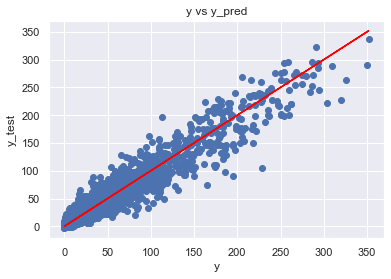

In [522]:
# 散布図を描画(真値 vs 予測値)
plt.plot(y_test, y_test, color = 'red', label = 'x=y') # 直線y = x (真値と予測値が同じ場合は直線状に点がプロットされる)
plt.scatter(y_test, y_pred) # 散布図のプロット
plt.xlabel('y') # x軸ラベル
plt.ylabel('y_test') # y軸ラベル
plt.title('y vs y_pred') # グラフタイトル

In [523]:
# モデル評価
# rmse : 平均二乗誤差の平方根
mse = mean_squared_error(y_test, y_pred) # MSE(平均二乗誤差)の算出
rmse = np.sqrt(mse) # RSME = √MSEの算出
print('RMSE :',rmse)

# r2 : 決定係数
r2 = r2_score(y_test,y_pred)
print('R2 :',r2)

RMSE : 13.886513911684485
R2 : 0.9246024605910079
